# Build a Regularized Linear Regression Model

Our objective is to build a Regularized Linera Regression model with the given dataset, but before going in to it we need to check and calrify how this dataset behaves on Linear Regresion model. A Regularized Linera Regression model is considered when there is Overfitting on Linear Regression model.

## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("train(1).csv")

In [13]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', None)
df

#pd.set_option('max_columns', None) -- baxk to normal

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [14]:
#df.nunique()

In [15]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
import missingno as msno

<AxesSubplot:>

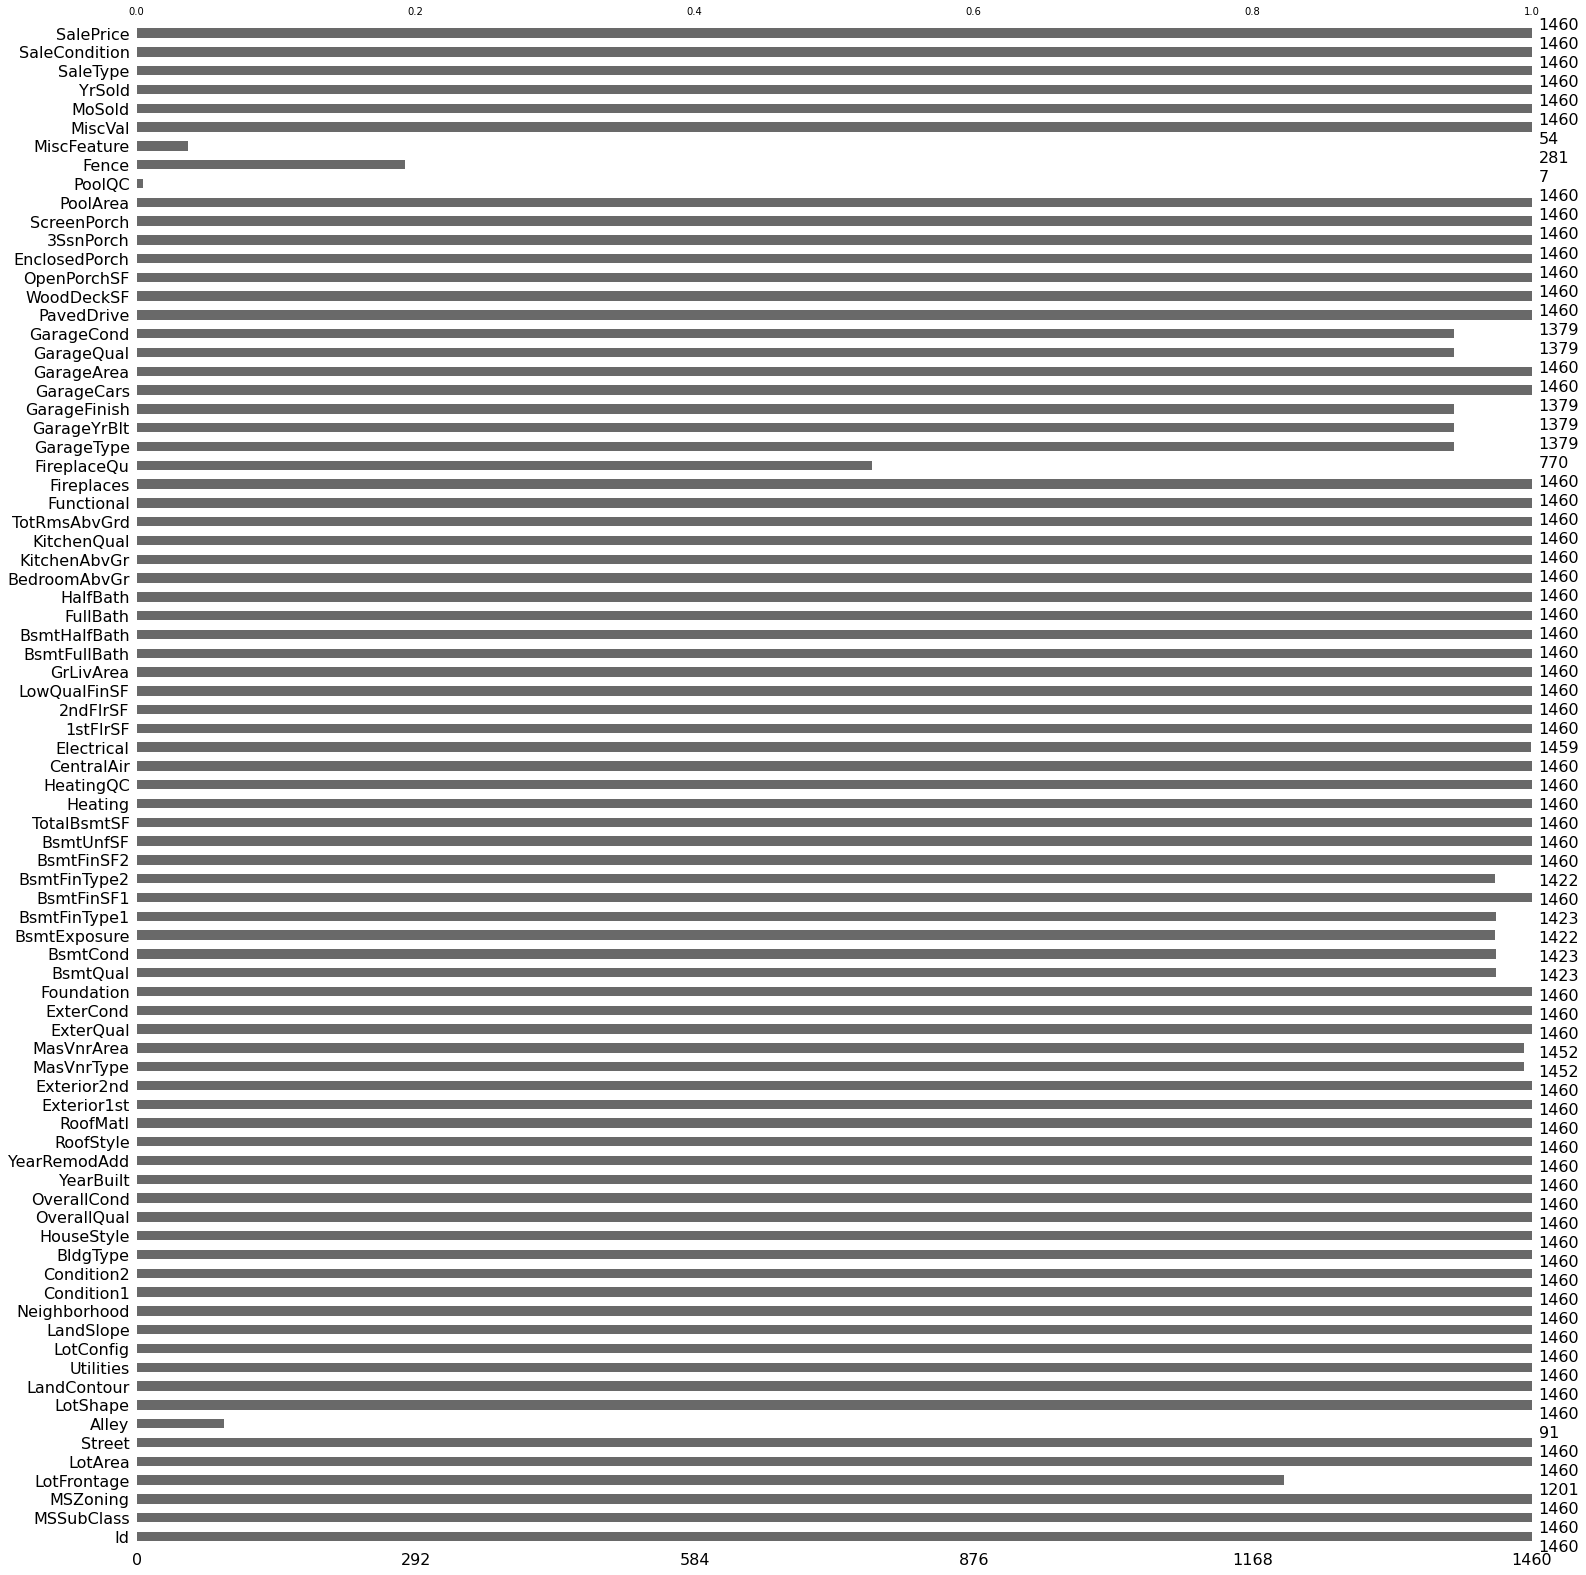

In [17]:
msno.bar(df)

In [18]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [19]:
df.shape

(1460, 81)

In [20]:
df=df.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis="columns") #These columns are having large number of null values and its is not possible to fill them with any other values

In [21]:
df.shape

(1460, 76)

In [22]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [23]:
df["LotFrontage"]=df["LotFrontage"].fillna(df.LotFrontage.mean()) #Here we can use the mean value to fill the missing columns

In [24]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(df.MasVnrArea.mean()) #Here we can use the mean value to fill the missing columns

In [25]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [26]:
df.dropna(inplace=True) # Now there is only a few rows that are missing hence droping of these rowns willnot give a huge impact on the dataset
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [27]:
df.shape

(1338, 76)

## 2. Extract features and target varibales

In [28]:
y=df["SalePrice"]

In [29]:
X=df.drop("SalePrice",axis=True)

In [30]:
X.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

## 3. Features should be of numeric in natutre

In [31]:
X.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [32]:
#We have found several columns are not of numeric in nature, so using dummy encoding we aec resolving it

X=pd.get_dummies(X,drop_first=True)
X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1   

## 4. Features must have some rows and some columns 

In [33]:
X.shape

(1338, 228)

## 5. Features should be of array/ dataframe 

In [34]:
type(X)

pandas.core.frame.DataFrame

## 6. Split the dataset in to training and testing 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

## 7. Features should be of the same scale

In [37]:
X.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1338.000000  1338.000000  1338.000000    1338.000000  1338.000000   
mean    731.228700    56.136024    70.630187   10706.294469     6.219731   
std     421.779691    41.252576    22.161578   10336.621126     1.324472   
min       1.000000    20.000000    21.000000    1300.000000     2.000000   
25%     366.250000    20.000000    60.000000    7744.000000     5.000000   
50%     730.500000    50.000000    70.049958    9600.000000     6.000000   
75%    1098.750000    70.000000    80.000000   11760.750000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1338.000000  1338.000000   1338.000000  1338.000000  1338.000000   
mean      5.596413  1973.029148   1985.668909   110.360239   464.234679   
std       1.078124    29.563540     20.296463   185.604816   458.792420   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1956.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.500000     0.000000   413.000000   
75%       6.000000  2001.000000   2004.000000   174.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     49.218236   582.494768  1095.947683  1176.221973   357.141256   
std     166.196584   439.950528   405.554435   386.644986   440.324982   
min       0.000000     0.000000   105.000000   438.000000     0.000000   
25%       0.000000   248.000000   819.750000   894.000000     0.000000   
50%       0.000000   489.000000  1021.500000  1098.000000     0.000000   
75%       0.000000   815.750000  1324.000000  1414.000000   740.500000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1338.000000  1338.000000   1338.000000   1338.000000  1338.000000   
mean       4.221973  1537.585202      0.438714      0.060538     1.575486   
std       40.712916   520.579960      0.515630      0.241685     0.547570   
min        0.000000   438.000000      0.000000      0.000000     0.000000   
25%        0.000000  1160.000000      0.000000      0.000000     1.000000   
50%        0.000000  1480.000000      0.000000      0.000000     2.000000   
75%        0.000000  1791.500000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      2.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1338.000000   1338.000000   1338.000000   1338.000000  1338.000000   
mean      0.402840      2.864723      1.029895      6.550075     0.648729   
std       0.504185      0.776677      0.174697      1.585071     0.645393   
min       0.000000      0.000000      1.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     12.000000     3.000000   

       GarageYrBlt  GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1338.000000  1338.00000  1338.000000  1338.000000  1338.000000   
mean   1978.596413     1.87145   501.449925    99.384903    47.782511   
std      24.773741     0.63428   186.761863   127.537065    65.362562   
min    1900.000000     1.00000   160.000000     0.000000     0.000000   
25%    1962.000000     1.00000   377.500000     0.000000     0.000000   
50%    1980.000000     2.00000   484.000000     6.000000    28.000000   
75%    2002.000000     2.00000   583.000000   174.500000    70.000000   
max    2010.0000

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
X_train=scaler.fit_transform(X_train)

In [41]:
X_test=scaler.transform(X_test)

In [42]:
pd.DataFrame(X_train,columns=X.columns).describe()

Id   MSSubClass  LotFrontage      LotArea  OverallQual  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.504265     0.216905     0.171584     0.044548     0.529322   
std       0.286340     0.244193     0.078417     0.050502     0.166389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.260110     0.000000     0.133562     0.030382     0.375000   
50%       0.505826     0.176471     0.167979     0.038795     0.500000   
75%       0.750343     0.294118     0.202055     0.049049     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1070.000000  1070.000000   1070.000000  1070.000000  1070.000000   
mean      0.511215     0.718850      0.599143     0.071089     0.082943   
std       0.153791     0.226910      0.336000     0.120360     0.082016   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.428571     0.584615      0.300000     0.000000     0.000000   
50%       0.428571     0.738462      0.750000     0.000000     0.074415   
75%       0.571429     0.930769      0.900000     0.109844     0.130758   
max       1.000000     1.000000      1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.031490     0.249139     0.165118     0.173886     0.177623   
std       0.107555     0.187635     0.068550     0.092007     0.215690   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.107984     0.119109     0.107193     0.000000   
50%       0.000000     0.209760     0.153039     0.154795     0.000000   
75%       0.000000     0.349315     0.204246     0.230430     0.361864   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1070.000000  1070.000000   1070.000000   1070.000000  1070.000000   
mean       0.006268     0.213131      0.219159      0.030374     0.529283   
std        0.070650     0.102283      0.259267      0.121431     0.183296   
min        0.000000     0.000000      0.000000      0.000000     0.000000   
25%        0.000000     0.142198      0.000000      0.000000     0.333333   
50%        0.000000     0.200615      0.000000      0.000000     0.666667   
75%        0.000000     0.260761      0.500000      0.000000     0.666667   
max        1.000000     1.000000      1.000000      1.000000     1.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1070.000000   1070.000000   1070.000000   1070.000000  1070.000000   
mean      0.206542      0.480218      0.028972      0.395742     0.221807   
std       0.254711      0.129554      0.167806      0.176957     0.215842   
min       0.000000      0.000000      0.000000      0.000000     0.000000   
25%       0.000000      0.333333      0.000000      0.222222     0.000000   
50%       0.000000      0.500000      0.000000      0.333333     0.333333   
75%       0.500000      0.500000      0.000000      0.444444     0.333333   
max       1.000000      1.000000      1.000000      1.000000     1.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.701932     0.295950     0.272839     0.136386     0.088478   
std       0.236134     0.211543     0.148145     0.171319     0.120420   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.538462     0.000000     0.178060     0.000000     0.000000   
50%       0.721154     0.333333     0.257552     0.048234     0.051188   
75%       0.923077     0.333333     0.340223     0.243886     0.127971   
max       1.000000     1.0

## 8. Train the dataset on training dataset 

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model.fit(X_train,y_train)

LinearRegression()

In [46]:
model.score(X_train,y_train)

0.9308886671654164

## 9. Test the dataset on testing data

### Linear Regression

In [47]:
model.score(X_test,y_test)

-9.338676507644886e+20

After training and testing the dataset on LinearRegression model our result was not a satisfying one, we are facing the issue of Overfitting so using RegularizedLinearRegression model we try to solve it: 

    Two of commonly used models are - 
            Lasso Regression and 
            Ridge Regression

## Regularized Linear Regression

In [48]:
from sklearn import linear_model

### Lasso Regression

In [49]:
lasso_reg=linear_model.Lasso(alpha=5,max_iter=100,tol=0.1)

In [50]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=5, max_iter=100, tol=0.1)

In [51]:
lasso_reg.score(X_train,y_train)

0.8860891738134166

In [83]:
lasso_reg.score(X_test,y_test)

0.8367931663840771

### Ridge Regresssion

In [53]:
ridge_reg=linear_model.Ridge(alpha=5,max_iter=100,tol=0.1)

In [54]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=5, max_iter=100, tol=0.1)

In [55]:
ridge_reg.score(X_train,y_train)

0.8874771528004132

In [82]:
ridge_reg.score(X_test,y_test)

0.8656802334706731

## Lasso Regression Test Score= 0.8367
## Ridge Regression Test Score=0.8656

### Both of them is better than Linear Regression Test Score, that is -9.3386

It is found that the model trained on RidgeRegression is slightly better that LassoRegression Model.